In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv(r"C:\Users\Vedant Maladkar\Downloads\Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df[df.isnull().any(axis=1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [5]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [6]:
scalar=StandardScaler()
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]=scalar.fit_transform(df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
y=df['Species']
x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [10]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = sm.add_constant(x)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         feature        VIF
0          const   1.000000
1  SepalLengthCm   7.103113
2   SepalWidthCm   2.099039
3  PetalLengthCm  31.397292
4   PetalWidthCm  16.141564


In [11]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

         feature       VIF
0          const  1.000000
1  SepalLengthCm  3.414225
2   SepalWidthCm  1.294507
3   PetalWidthCm  3.864678


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [15]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [16]:
r2_score(y_test,y_pred)

0.9523052464228935

In [17]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.03333333333333333


In [18]:
cr=classification_report(y_test,y_pred, target_names=['Setosa', 'versicolor', 'virginica'])
print(cr)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [19]:
model = LogisticRegression()
K=5
kfold = KFold(K,random_state=0,shuffle=True)
mse_cv = cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
print(mse_cv)

[1.         0.9        1.         1.         0.93333333]


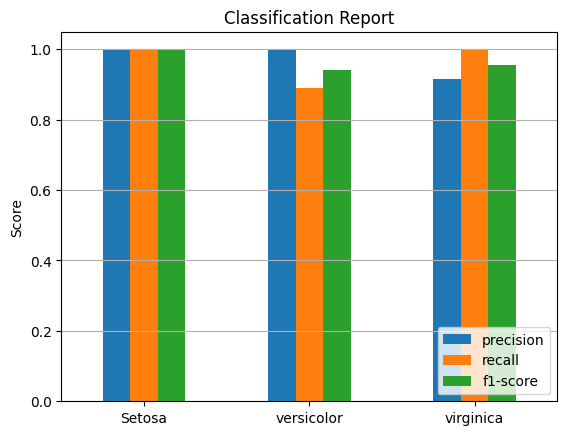

In [20]:
labels = ['Setosa', 'versicolor', 'virginica']

report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

me_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score']].iloc[:3]

me_df.plot(kind='bar')
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')